In [1]:
import math
import random
import decimal
import scipy.linalg
import numpy.random as nrand
import matplotlib.pyplot as plt
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot



from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, Matern


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def ou_levels(a,b,dt,sigma,time):
    #This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    x = np.zeros(len(time))
    for i in range(0, len(time)-1):
        x[i+1]=x[i]+a*(b-x[i])*dt+math.sqrt(dt)*sigma*np.random.normal(0,1)
    return x

In [3]:
#OU data
# get OU data first
dt=0.02
time=np.arange(0,50,dt)# time
sigma=1
a=1# the coefficient in front, the rate
b=0# the mean
training_data=ou_levels(a,b,dt,sigma,time)
#t=time# time vector
#x=training_data
#t=t[::8]
#x=x[::8]
#t_column=t.reshape(-1,1)
#x_column=x.reshape(-1,1)

In [4]:
# changing the code
X=time.reshape(-1,1)
y=training_data

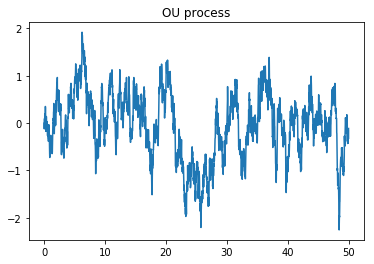

In [5]:
plt.plot(X,y)
plt.title('OU process')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


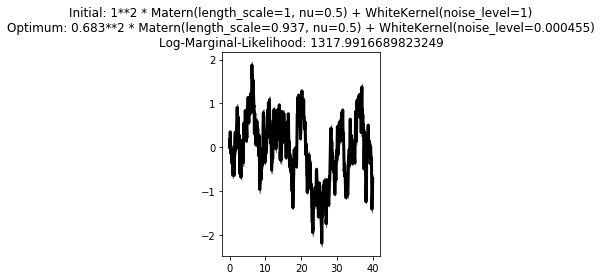

In [6]:
# First run
plt.figure(0)
kernel = ConstantKernel(1.0) * Matern(length_scale=1.0,nu=0.5) \
    + WhiteKernel(noise_level=1)
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0).fit(X, y)
#X_ = np.linspace(0, 5, 100)# watch it here, old code
dt=0.05
X_=np.arange(0,40,dt)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
# time_=X_
# y_=ou_levels(a,b,dt,sigma,time)
# plt.plot(X_, y_, 'r', lw=3, zorder=9)# this is what I think about, ou_levels(a,b,dt,sigma,time)
# plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
           % (kernel, gp.kernel_,
              gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.show()


In [7]:
theta0 = np.linspace(1e-4, 1, 40)
theta1 = np.linspace(1e-4, 2, 40)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood([np.log(Theta0[i, j]), np.log(Theta1[i, j]),gp.kernel_.theta[2]])# here is the key that 0.70 that is the function variance
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T


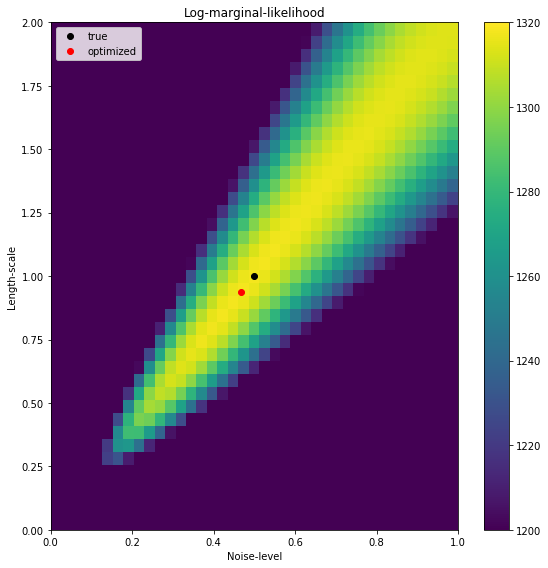

In [9]:
plt.figure(figsize=(8,8))
plt.ylabel("Length-scale")
plt.xlabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()
#plt.axis('equal')
plt.pcolor(Theta0, Theta1, LML,vmin=1200,vmax=1320)
plt.colorbar()
plt.plot(0.5, 1, 'ko', zorder=10,label='true')
plt.plot(np.exp(gp.kernel_.theta[0]), np.exp(gp.kernel_.theta[1]), 'ro', zorder=10,label='optimized')
plt.legend(loc="upper left")
plt.show()

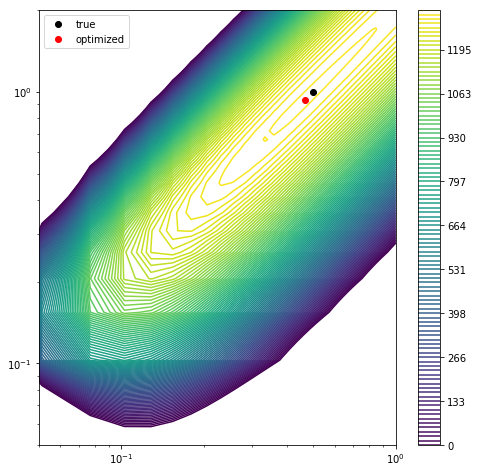

In [13]:

plt.figure(figsize=(8,8))
level = np.linspace(0, 1315, 100)#, decimals=1)
plt.contour(Theta0, Theta1, LML,levels=level)#,norm=LogNorm(vmin=50, vmax=100))
plt.colorbar()
plt.plot(0.5, 1, 'ko', zorder=10,label='true')
plt.plot(np.exp(gp.kernel_.theta[0]), np.exp(gp.kernel_.theta[1]), 'ro', zorder=10,label='optimized')
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")
plt.axis([0.05,1,0.05,2])
plt.show()
